# Accuracy Saliency?

Does the treatment increase the relationship between accuracy and sharing behaviour?

Answer: **YES** there is a very significant interaction effect between the condition assignment and the perceived accuracy of a rumour on the affirmation rate.

In [2]:
library(lme4)
library(e1071) 
library(effects)
library(parameters) 
options(scipen = 100)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_tiktok,socialMedias_tumblr,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,veracityEstimate
,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1002376229115702528,1,2021-06-03 14:18:19.569000+00:00,undergrad,centreLeft,False,29,1,0,0,⋯,1,0,1,Control,High,0.0,0.0,0.00,0.75,1
2,-1044319514900072064,1,2021-06-07 19:52:22.236000+00:00,graduateSchool,left,True,27,0,0,1,⋯,0,0,0,Treatment,High,0.5,0.2,0.75,1.00,6
3,-1044319514900072064,1,2021-06-07 19:52:22.236000+00:00,graduateSchool,left,True,27,0,0,1,⋯,0,0,0,Treatment,Low,0.6,0.9,1.00,1.00,9
4,-1058955249952971904,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,0,0,Treatment,High,0.2,0.2,0.25,0.50,5
5,-1058955249952971904,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,0,0,Treatment,Low,0.3,0.6,0.25,0.00,8
6,-1338418376815842304,1,2021-06-04 13:48:40.369000+00:00,communityCollege,centreRight,False,37,1,0,0,⋯,0,0,0,Treatment,Low,0.1,0.0,0.00,0.00,6


In [11]:
md.baseline = lmer(sqrt(Affirms) ~ veracityEstimate + (1 |user_id), data = data)
p_value_satterthwaite(md.baseline)
summary(md.baseline)

Parameter,p
<chr>,<dbl>
(Intercept),0.000002159967
veracityEstimate,0.000196509000


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ veracityEstimate + (1 | user_id)
   Data: data

REML criterion at convergence: 15.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.92623 -0.61099 -0.05708  0.57014  2.38383 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.02956  0.1719  
 Residual             0.03643  0.1909  
Number of obs: 199, groups:  user_id, 107

Fixed effects:
                 Estimate Std. Error t value
(Intercept)      0.185751   0.038021   4.885
veracityEstimate 0.024022   0.006323   3.799

Correlation of Fixed Effects:
            (Intr)
verctyEstmt -0.824

In [30]:
md.interaction = lmer(sqrt(Affirms) ~ condition * veracityEstimate + evidence + (1 |user_id), data = data)
p_value_satterthwaite(md.interaction)
summary(md.interaction)

Parameter,p
<chr>,<dbl>
(Intercept),0.0000001483337
conditionTreatment,0.0438780888514
veracityEstimate,0.1988841871496
evidenceLow,0.0095616391321
conditionTreatment:veracityEstimate,0.0098580468981


Linear mixed model fit by REML ['lmerMod']
Formula: sqrt(Affirms) ~ condition * veracityEstimate + evidence + (1 |  
    user_id)
   Data: data

REML criterion at convergence: 17.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0811 -0.5785 -0.0229  0.5181  2.5649 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03019  0.1737  
 Residual             0.03305  0.1818  
Number of obs: 199, groups:  user_id, 107

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                          0.287187   0.052649   5.455
conditionTreatment                  -0.150778   0.074322  -2.029
veracityEstimate                     0.010787   0.008364   1.290
evidenceLow                         -0.069990   0.026481  -2.643
conditionTreatment:veracityEstimate  0.032175   0.012337   2.608

Correlation of Fixed Effects:
            (Intr) cndtnT vrctyE evdncL
cndtnTrtmnt -0.679                     
verctyEstmt -0.785  0

In [31]:
anova(md.baseline,md.interaction)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
md.baseline,4,9.1795345,22.35275,-0.5897672,1.179534,NA,NA,NA
md.interaction,7,0.4604815,23.51362,6.7697592,-13.539518,14.71905,3,0.00207318


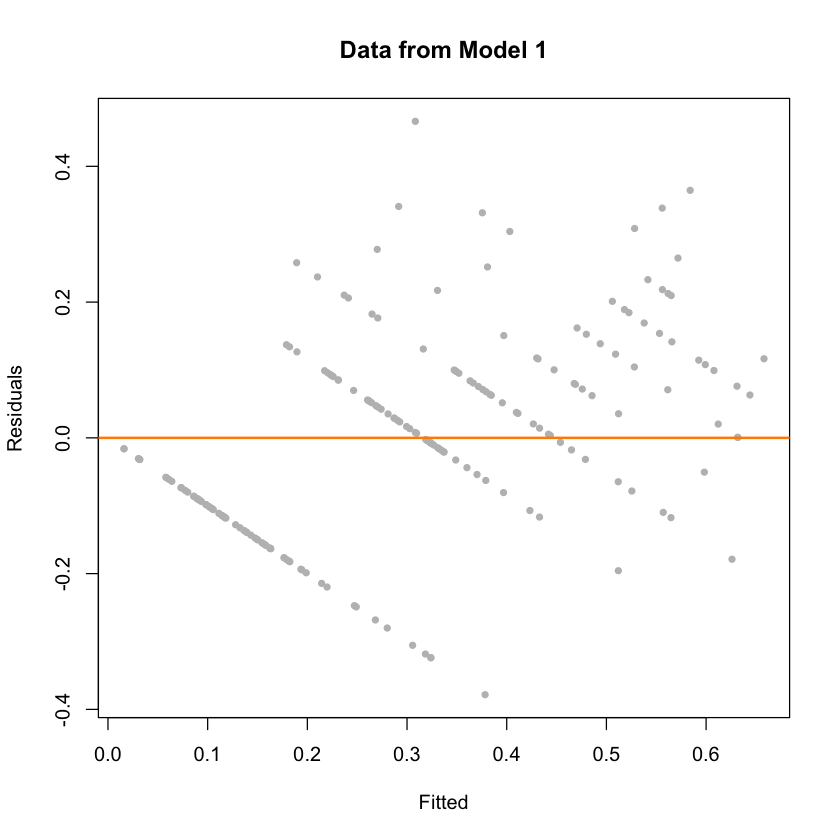

In [32]:
plot(fitted(md.interaction), resid(md.interaction), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)


	Shapiro-Wilk normality test

data:  resid(md.interaction)
W = 0.99349, p-value = 0.5311


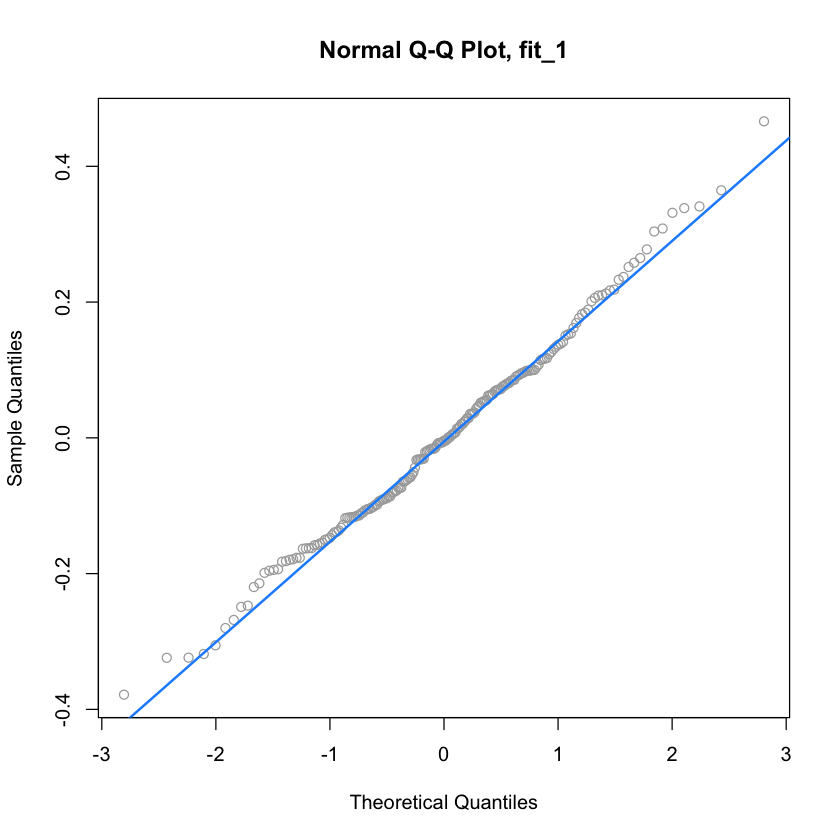

In [33]:
shapiro.test(resid(md.interaction))
qqnorm(resid(md.interaction), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.interaction), col = "dodgerblue", lwd = 2)

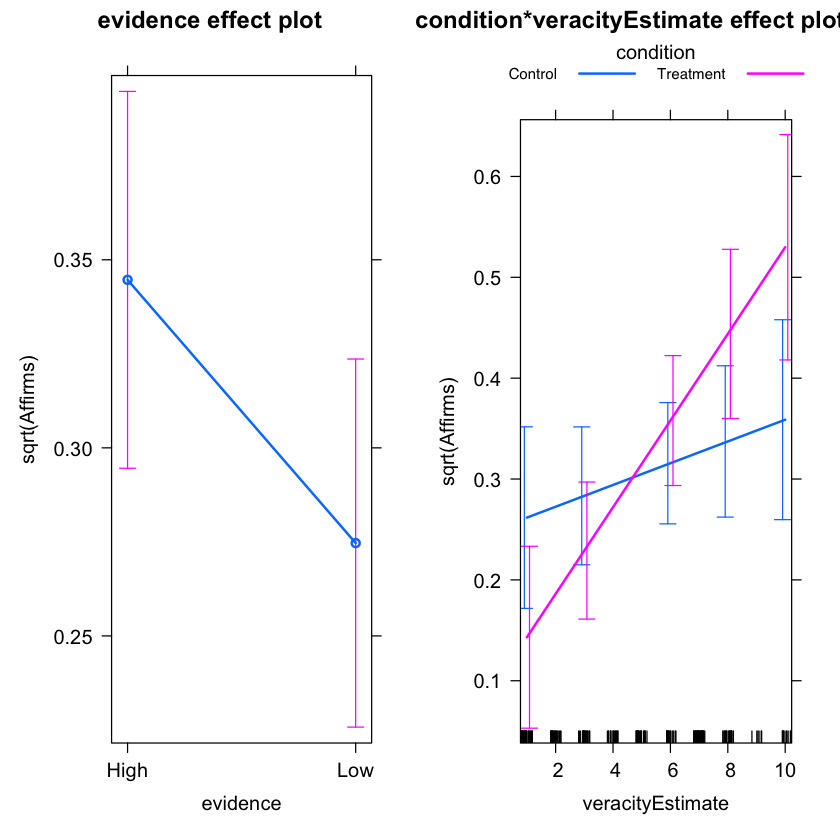

In [34]:
plot(allEffects(md.interaction), multiline=TRUE, ci.style="bars")